In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [152]:
data=pd.read_csv('marketing_campaign.csv',sep='\t',index_col=0)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Content**
Attributes

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [154]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [155]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

C:\Users\j\Anaconda3\envs\dl_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Income'>

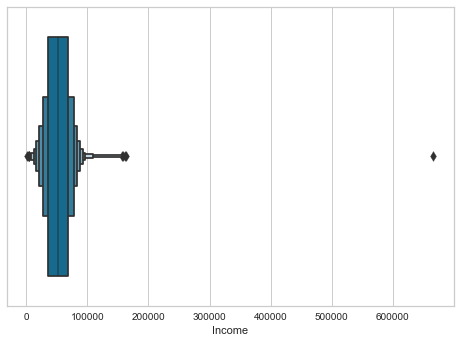

In [156]:
sns.boxenplot(data['Income'])

In [157]:
data.loc[data['Income'].isnull(),'Income']=data['Income'].mean()

In [158]:
data.isnull().sum().sum()

0

## Segment data

In [159]:
person=data.loc[:,['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency','Complain']]
person.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
ID,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [160]:
products=data.loc[:,['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]
products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,635,88,546,172,88,88
2174,11,1,6,2,1,6
4141,426,49,127,111,21,42
6182,11,4,20,10,3,5
5324,173,43,118,46,27,15


In [161]:
promotion=data.loc[:,['NumDealsPurchases',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Response']]
promotion.head()

,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,,,,,,,
5524,3,0,0,0,0,0,1
2174,2,0,0,0,0,0,0
4141,1,0,0,0,0,0,0
6182,2,0,0,0,0,0,0
5324,5,0,0,0,0,0,0


In [162]:
places=data.loc[:,['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
places.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,
5524,8,10,4,7
2174,1,1,2,5
4141,8,2,10,4
6182,2,0,4,6
5324,5,3,6,5


## EDA

<AxesSubplot:xlabel='Year_Birth', ylabel='count'>

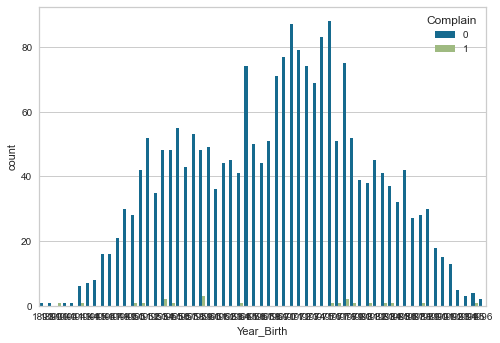

In [163]:
sns.countplot(x='Year_Birth',data=person,hue='Complain')

<AxesSubplot:xlabel='Education', ylabel='count'>

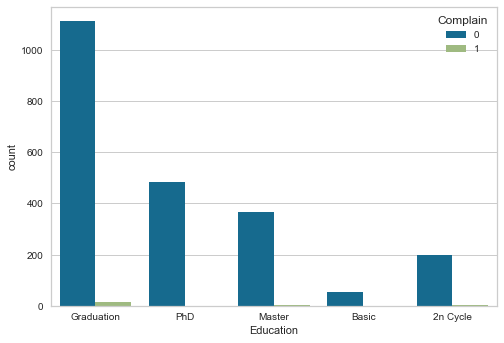

In [164]:
sns.countplot(x='Education',data=person,hue='Complain')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

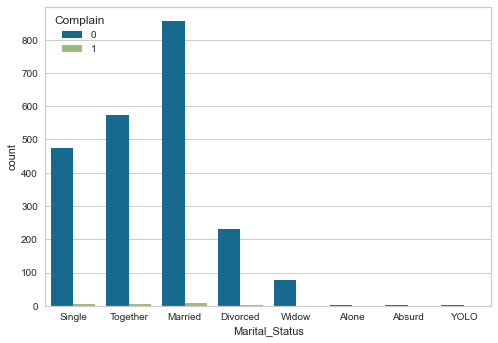

In [165]:
sns.countplot(x='Marital_Status',data=person,hue='Complain')

In [166]:
person.loc[~person['Marital_Status'].isin(['Married','Single','Together','Divorced','Widow']),'Marital_Status']='Others'

In [167]:
person['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Others        7
Name: Marital_Status, dtype: int64

## One Hot Encoding

In [168]:
from sklearn.preprocessing import OneHotEncoder

In [169]:
oh=OneHotEncoder(sparse=False,handle_unknown='ignore')
X_person=oh.fit_transform(person[['Education', 'Marital_Status']])
cols=[]
for i in oh.categories_:
    for j in i:
        cols.append(j)
X_person=pd.DataFrame(X_person,index=person.index,columns=cols)
X_person.head()

,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Others,Single,Together,Widow
ID,,,,,,,,,,,
5524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4141,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5324,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [170]:
dt_cust=person['Dt_Customer'].str.split('-',expand=True)
dt_cust.columns=['Day','Month','Year']
dt_cust.head()

,Day,Month,Year
ID,,,
5524,04,09,2012
2174,08,03,2014
4141,21,08,2013
6182,10,02,2014
5324,19,01,2014


In [171]:
person=person.drop(['Education', 'Marital_Status','Dt_Customer'],axis=1)
person.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain
ID,,,,,,
5524,1957,58138.0,0,0,58,0
2174,1954,46344.0,1,1,38,0
4141,1965,71613.0,0,0,26,0
6182,1984,26646.0,1,0,26,0
5324,1981,58293.0,1,0,94,0


In [172]:
person=pd.concat([person,dt_cust],axis=1)
person.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,Day,Month,Year
ID,,,,,,,,,
5524,1957,58138.0,0,0,58,0,04,09,2012
2174,1954,46344.0,1,1,38,0,08,03,2014
4141,1965,71613.0,0,0,26,0,21,08,2013
6182,1984,26646.0,1,0,26,0,10,02,2014
5324,1981,58293.0,1,0,94,0,19,01,2014


In [173]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
minmax_person=MinMaxScaler()
X_mm=minmax_person.fit_transform(person)
X_mm=pd.DataFrame(X_mm,index=person.index,columns=person.columns)
X_mm.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,Day,Month,Year
ID,,,,,,,,,
5524,0.621359,0.084832,0.0,0.0,0.585859,0.0,0.100000,0.727273,0.0
2174,0.592233,0.067095,0.5,0.5,0.383838,0.0,0.233333,0.181818,1.0
4141,0.699029,0.105097,0.0,0.0,0.262626,0.0,0.666667,0.636364,0.5
6182,0.883495,0.037471,0.5,0.0,0.262626,0.0,0.300000,0.090909,1.0
5324,0.854369,0.085065,0.5,0.0,0.949495,0.0,0.600000,0.000000,1.0


In [175]:
person=pd.concat([X_mm,X_person],axis=1)
person.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,Day,Month,Year,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Others,Single,Together,Widow
ID,,,,,,,,,,,,,,,,,,,,
5524,0.621359,0.084832,0.0,0.0,0.585859,0.0,0.100000,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2174,0.592233,0.067095,0.5,0.5,0.383838,0.0,0.233333,0.181818,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4141,0.699029,0.105097,0.0,0.0,0.262626,0.0,0.666667,0.636364,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6182,0.883495,0.037471,0.5,0.0,0.262626,0.0,0.300000,0.090909,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5324,0.854369,0.085065,0.5,0.0,0.949495,0.0,0.600000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [177]:
minmax_products=MinMaxScaler()
X_mm=minmax_products.fit_transform(products)
products=pd.DataFrame(X_mm,index=products.index,columns=products.columns)
products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
ID,,,,,,
5524,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094
2174,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575
4141,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022
6182,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812
5324,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436


In [178]:
#promotion, places
minmax_promotion=MinMaxScaler()
X_mm=minmax_promotion.fit_transform(promotion)
promotion=pd.DataFrame(X_mm,index=promotion.index,columns=promotion.columns)
promotion.head()

,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,,,,,,,
5524,0.200000,0.0,0.0,0.0,0.0,0.0,1.0
2174,0.133333,0.0,0.0,0.0,0.0,0.0,0.0
4141,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
6182,0.133333,0.0,0.0,0.0,0.0,0.0,0.0
5324,0.333333,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
minmax_places=MinMaxScaler()
X_mm=minmax_places.fit_transform(places)
places=pd.DataFrame(X_mm,index=places.index,columns=places.columns)
places.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,
5524,0.296296,0.357143,0.307692,0.35
2174,0.037037,0.035714,0.153846,0.25
4141,0.296296,0.071429,0.769231,0.20
6182,0.074074,0.000000,0.307692,0.30
5324,0.185185,0.107143,0.461538,0.25


In [180]:
X=pd.concat([person,products,promotion,places],axis=1)
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,Day,Month,Year,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Others,Single,Together,Widow,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,0.621359,0.084832,0.0,0.0,0.585859,0.0,0.100000,0.727273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.0,0.0,0.0,0.0,0.0,1.0,0.296296,0.357143,0.307692,0.35
2174,0.592233,0.067095,0.5,0.5,0.383838,0.0,0.233333,0.181818,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.035714,0.153846,0.25
4141,0.699029,0.105097,0.0,0.0,0.262626,0.0,0.666667,0.636364,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.296296,0.071429,0.769231,0.20
6182,0.883495,0.037471,0.5,0.0,0.262626,0.0,0.300000,0.090909,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.074074,0.000000,0.307692,0.30
5324,0.854369,0.085065,0.5,0.0,0.949495,0.0,0.600000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.185185,0.107143,0.461538,0.25


In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test = train_test_split(X,  test_size=0.3, random_state=42)

In [183]:
X_train.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,Day,Month,Year,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Others,Single,Together,Widow,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1640,0.592233,0.094531,0.5,0.5,0.494949,0.0,0.700000,0.454545,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.044206,0.000000,0.009275,0.000000,0.022814,0.055249,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.035714,0.307692,0.15
977,0.621359,0.068563,0.0,0.5,0.101010,0.0,0.000000,0.636364,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133958,0.095477,0.064348,0.193050,0.057034,0.052486,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.185185,0.035714,0.615385,0.30
10150,0.660194,0.127379,0.0,0.0,0.101010,0.0,0.666667,0.909091,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.310784,0.140704,0.506087,0.111969,0.068441,0.102210,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.259259,0.142857,0.538462,0.10
8181,0.825243,0.055438,0.5,0.0,0.424242,0.0,0.400000,0.727273,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.034159,0.060302,0.028406,0.065637,0.091255,0.066298,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.148148,0.035714,0.230769,0.40
1399,0.631068,0.107040,0.0,0.0,0.525253,0.0,0.666667,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.272605,0.572864,0.257971,0.698842,0.627376,0.560773,0.066667,0.0,0.0,0.0,1.0,0.0,0.0,0.111111,0.250000,0.692308,0.05


## 1.
Build a unsupervised algorithm to cluster customer data (recommended: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) . Write a short text of what is the key business takeaway of the recommendation.

In [184]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [185]:
wcss=[]
for i in range(2,20):
    kmeans=KMeans(n_clusters=i,random_state=102)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    

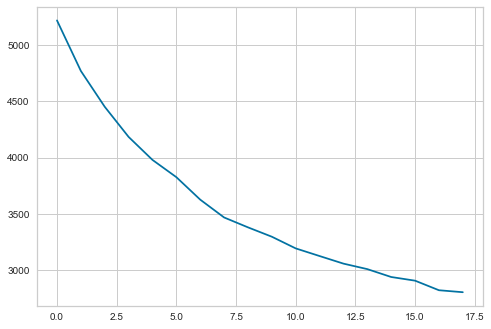

In [186]:
plt.plot(wcss)

There is no clear elbow visible in the curve. So we cannot use elbow method to determine the ideal number of clusters

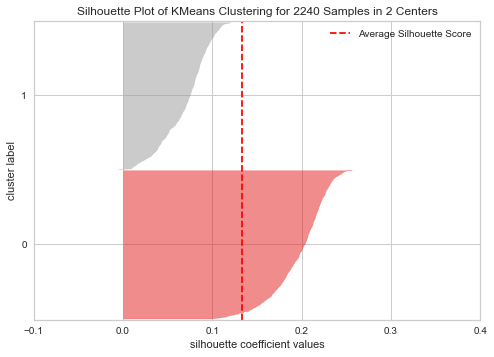

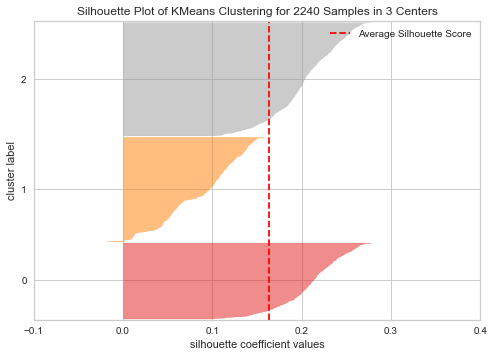

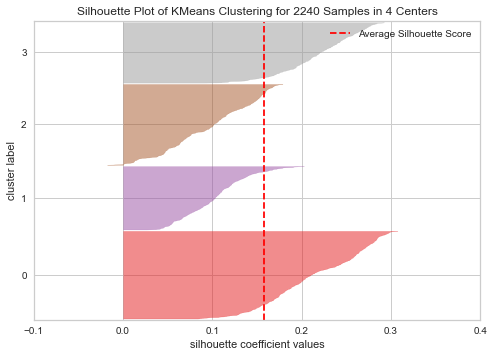

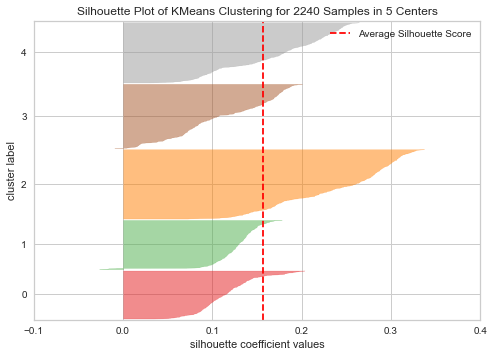

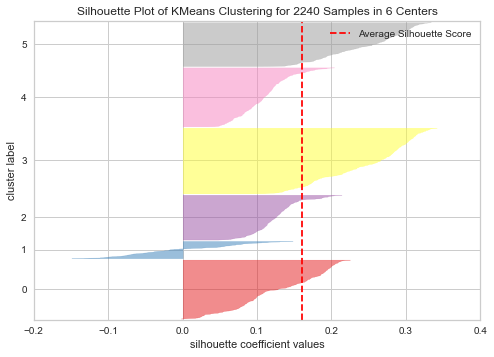

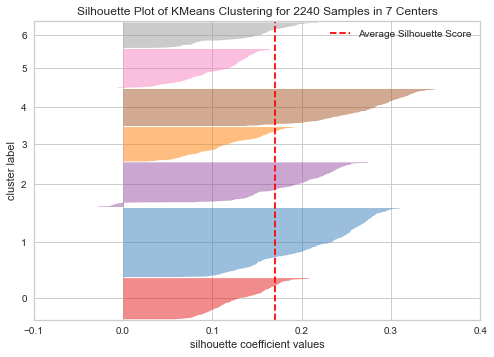

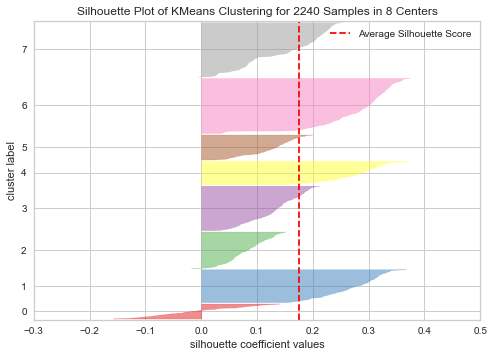

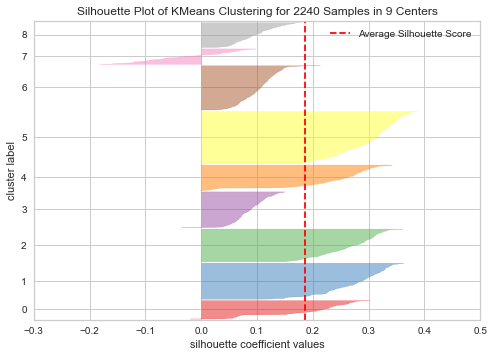

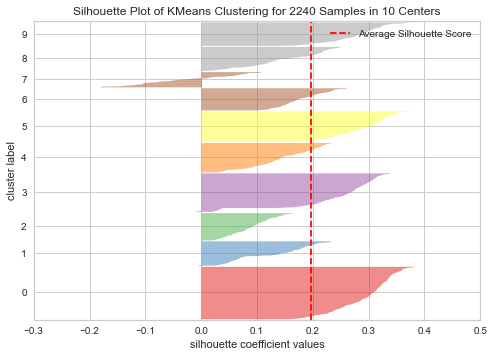

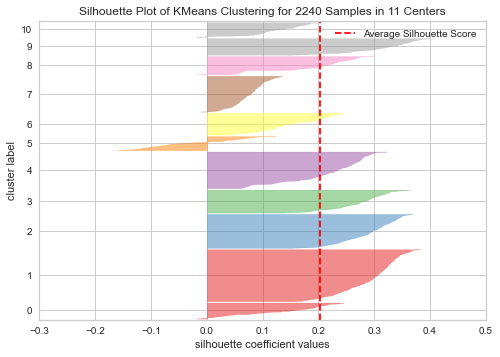

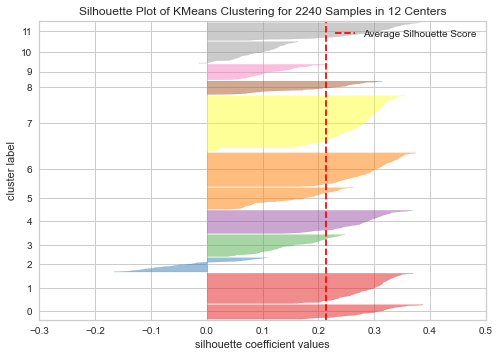

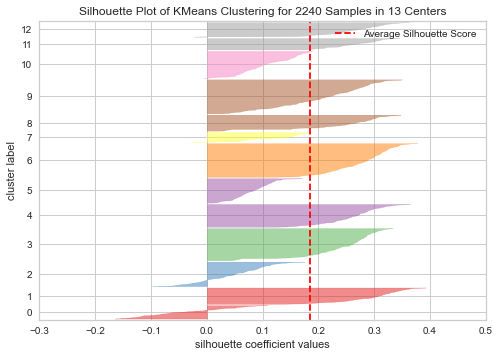

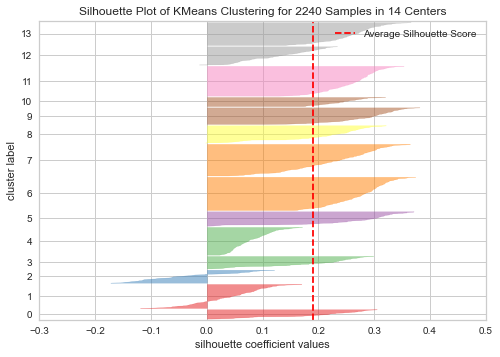

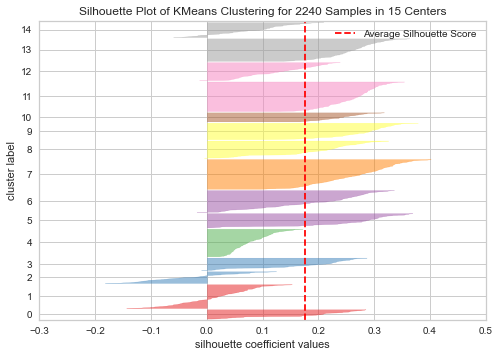

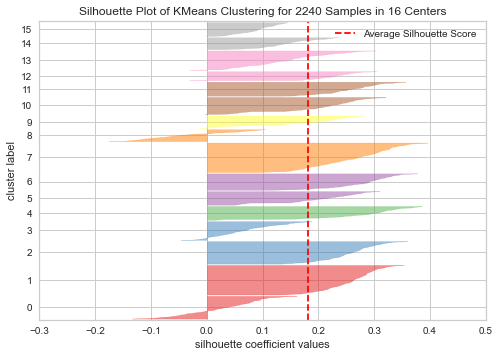

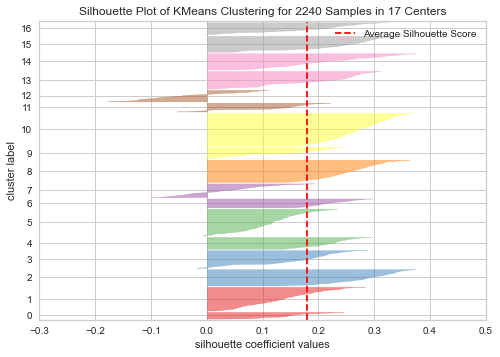

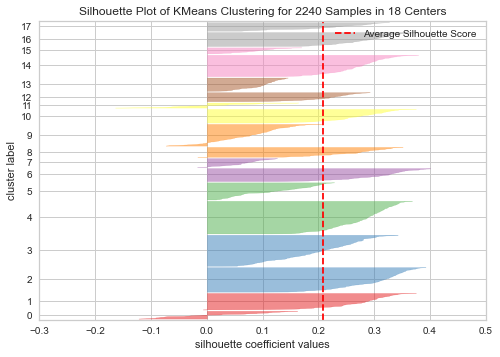

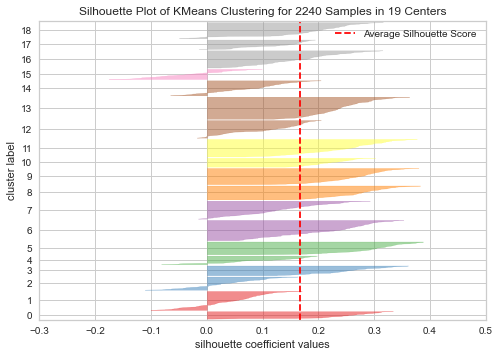

In [187]:
for i in range(2,20):
    model = SilhouetteVisualizer(KMeans(i,random_state=102))
    model.fit(X)
    model.show()

From the silhoette visualizer we can see that 5 clusters seems to be the optimum number.<br>
1. Clusters are all evenly sized
2. All clusters are greater than average silhoette score
3. No negative values in the cluster

In [188]:
kmeans_final=KMeans(4,random_state=102)
model_final=kmeans_final.fit(X)

In [189]:
y=pd.DataFrame(kmeans_final.predict(X),index=X.index,columns=['Predicted values'])
y.head()

,Predicted values
ID,
5524,2
2174,2
4141,3
6182,3
5324,1


In [199]:
data_1=data.drop(['Dt_Customer'],axis=1)
data_1=pd.concat([data_1,dt_cust],axis=1)
data_1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Day,Month,Year
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,04,09,2012
2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,08,03,2014
4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,21,08,2013
6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,10,02,2014
5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,19,01,2014


In [200]:
X_1=pd.concat([data_1,y],axis=1)
X_1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Day,Month,Year,Predicted values
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,04,09,2012,2
2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,08,03,2014,2
4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,21,08,2013,3
6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,10,02,2014,3
5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,19,01,2014,1


In [240]:
X_1=X_1.astype({'Day':'int','Month':'int','Year':'int64'})
X_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null 

In [241]:
group_1=X_1.groupby('Predicted values').mean()
group_1

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Day,Month,Year
Predicted values,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1970.263393,49915.650680,0.467262,0.491071,47.880952,262.035714,26.846726,153.436012,37.770833,28.632440,46.358631,2.342262,3.971726,2.458333,5.750000,5.398810,0.075893,0.062500,0.066964,0.074405,0.005952,0.011905,3.0,11.0,0.098214,15.708333,6.372024,2013.053571
1,1966.043210,56105.210405,0.401235,0.598765,48.483539,404.495885,20.049383,168.602881,26.728395,20.222222,32.310700,2.374486,4.423868,2.969136,6.061728,5.259259,0.082305,0.092593,0.080247,0.061728,0.020576,0.002058,3.0,11.0,0.207819,15.465021,6.543210,2013.059671
2,1969.710824,51536.387740,0.441034,0.449111,50.150242,284.245557,29.596123,179.867528,41.652666,29.807754,49.235864,2.213247,3.954766,2.684976,5.704362,5.323102,0.075929,0.075929,0.066236,0.059774,0.012924,0.011309,3.0,11.0,0.192246,15.715670,6.449111,2013.014540
3,1968.380130,52532.115568,0.460043,0.507559,50.157667,285.518359,27.671706,167.559395,42.984881,28.295896,45.952484,2.397408,4.066955,2.604752,5.678186,5.248380,0.053996,0.071274,0.082073,0.058315,0.017279,0.010799,3.0,11.0,0.103672,15.615551,6.550756,2012.976242


In [202]:
group_1.shape

(4, 25)

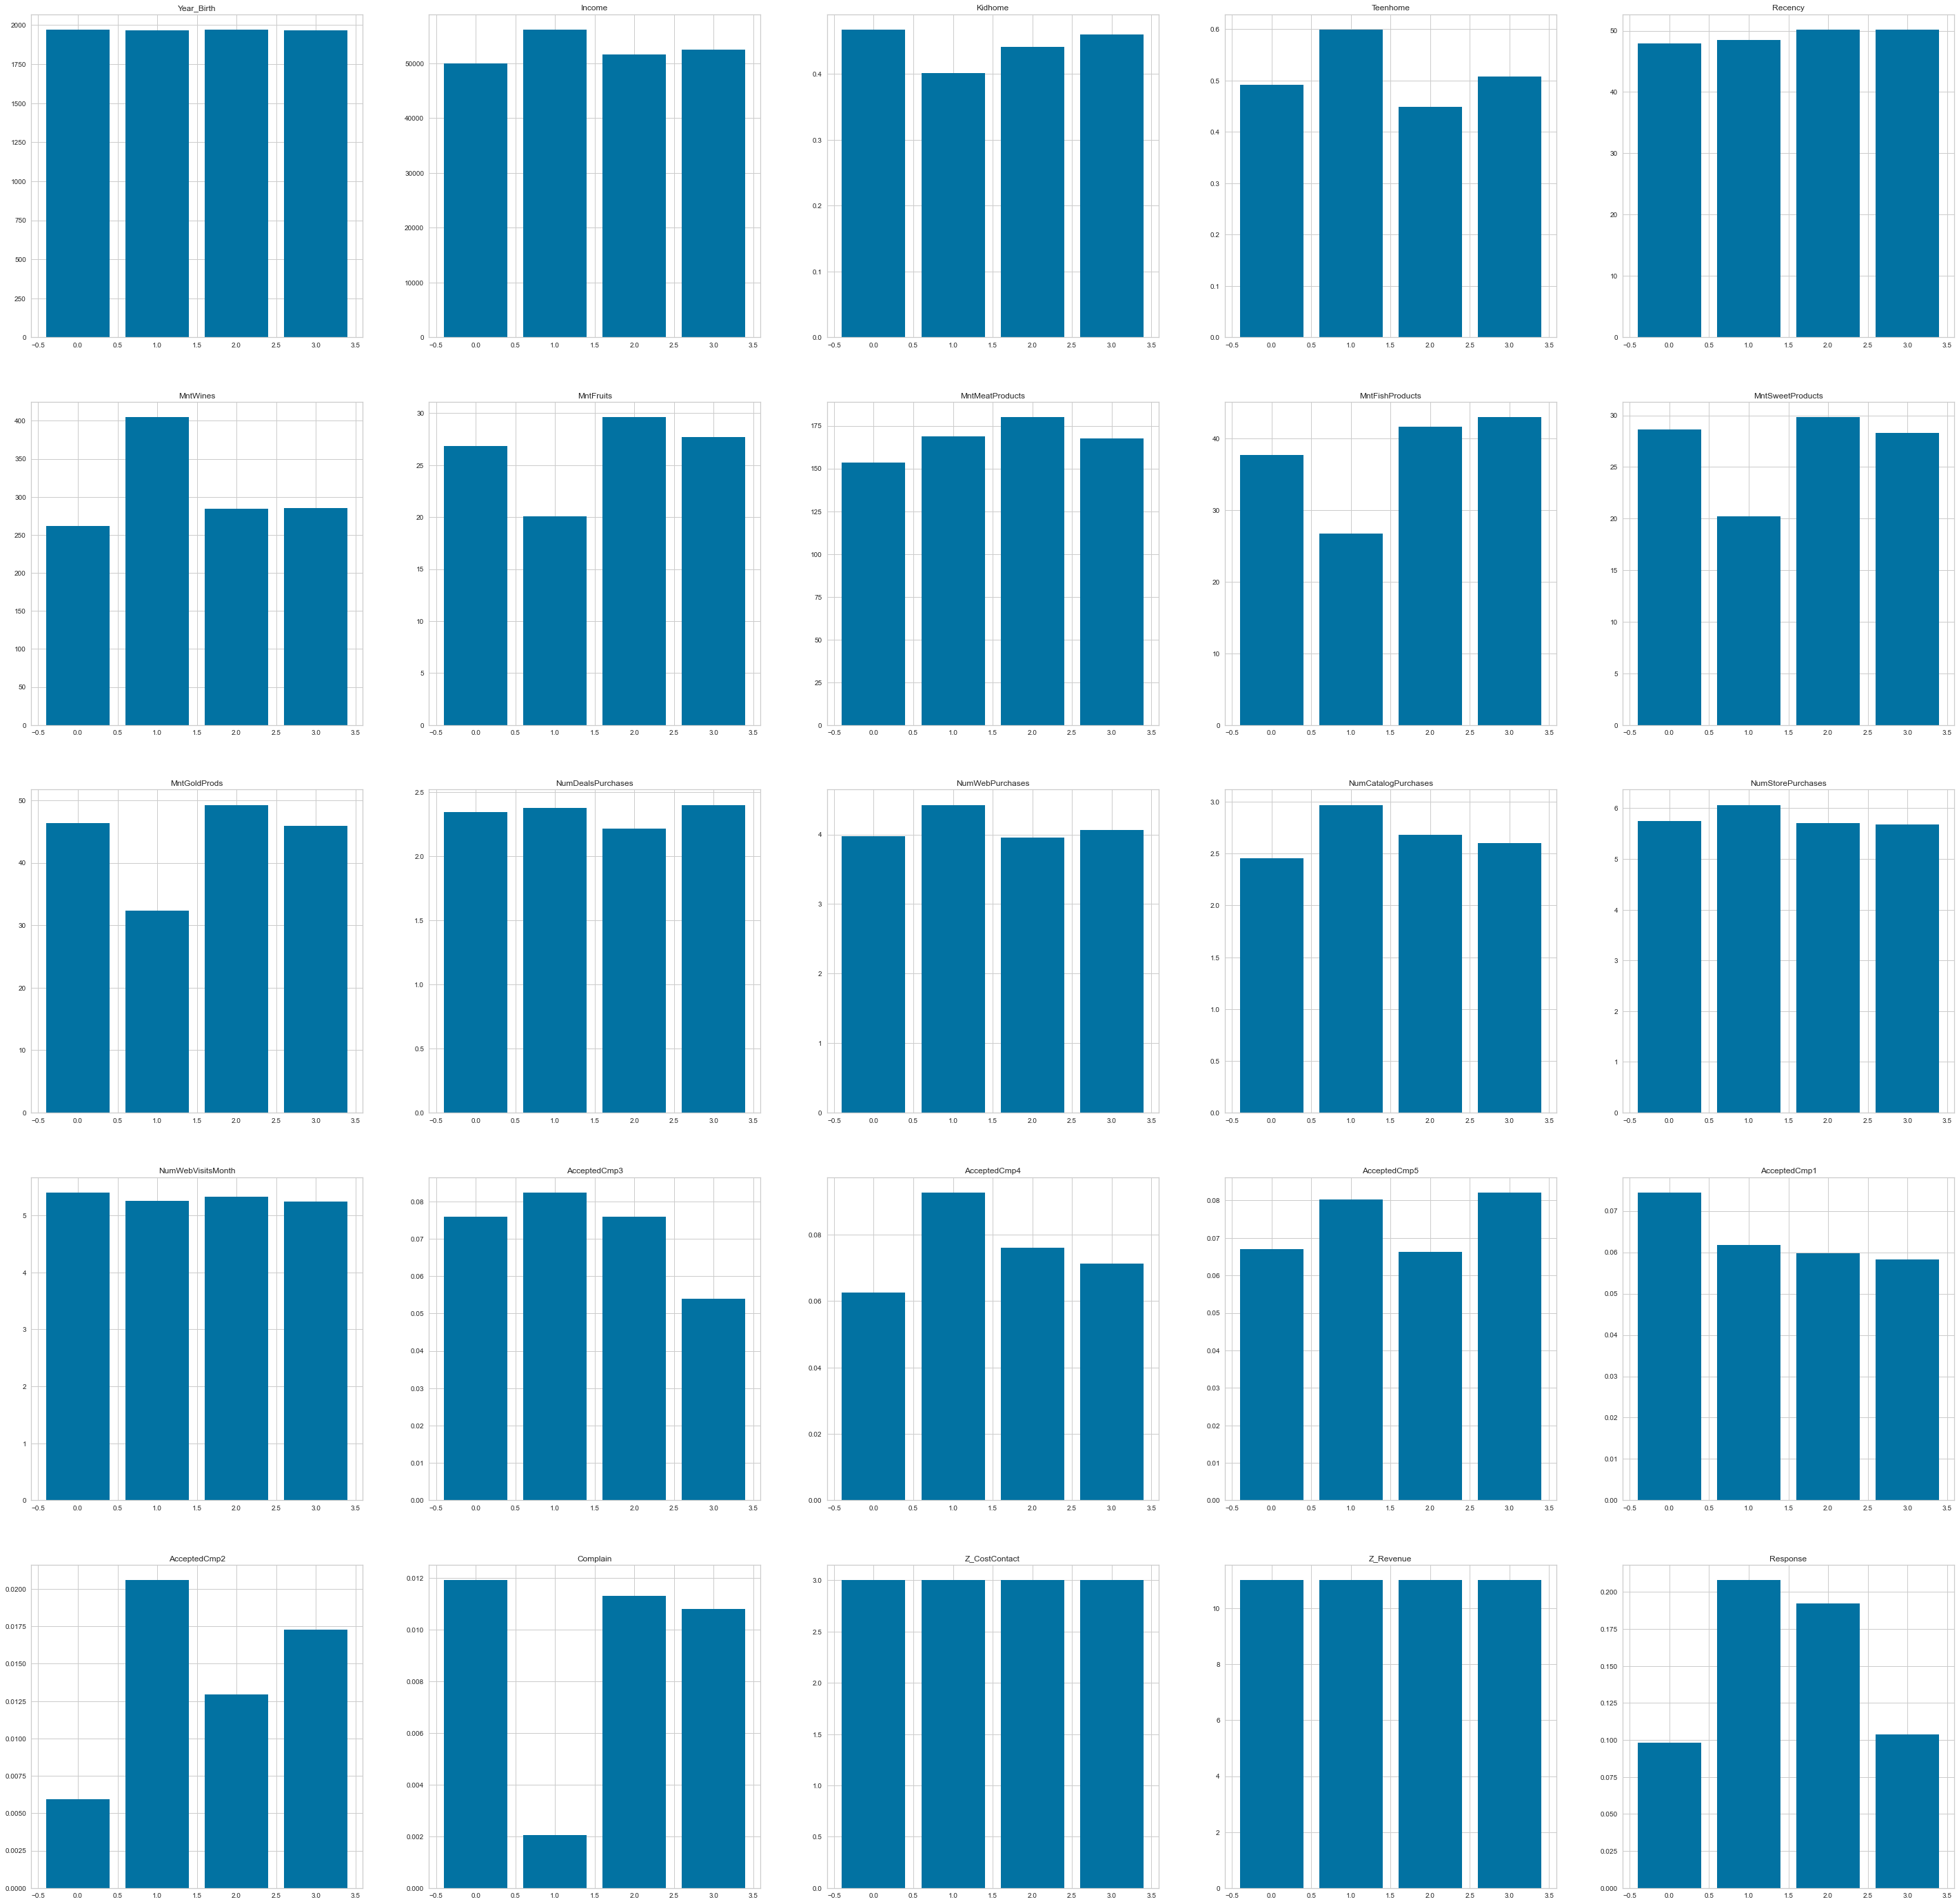

In [219]:
fig,ax=plt.subplots(5,5,figsize=(50,50))

ind=0
for i in range(5):
    for j in range(5):
        ax[i][j].bar(x=group_1.index,height=group_1.iloc[:,ind])
        ax[i][j].set_title(group_1.columns[ind])
        ind+=1
        
plt.show()

In [222]:
group_2=X_1.groupby('Predicted values').describe(include='object')

In [231]:
group_2[['Education','Marital_Status']]

Education                         Marital_Status         \
                     count unique         top freq          count unique   
Predicted values                                                           
0                      672      4  Graduation  433            672      1   
1                      486      1         PhD  486            486      7   
2                      619      4  Graduation  408            619      5   
3                      463      4  Graduation  286            463      1   

                                 
                       top freq  
Predicted values                 
0                  Married  672  
1                  Married  192  
2                   Single  382  
3                 Together  463

In [233]:
X_1.groupby('Predicted values').describe()

Year_Birth                                                  \
                      count         mean        std     min     25%     50%   
Predicted values                                                              
0                     672.0  1970.263393  11.396549  1943.0  1961.0  1972.0   
1                     486.0  1966.043210  11.975584  1899.0  1957.0  1967.0   
2                     619.0  1969.710824  12.672833  1893.0  1960.0  1970.0   
3                     463.0  1968.380130  11.384190  1945.0  1958.5  1969.0   

                                 Income                                      \
                     75%     max  count          mean           std     min   
Predicted values                                                              
0                 1978.0  1996.0  672.0  49915.650680  20912.939361  2447.0   
1                 1974.0  1991.0  486.0  56105.210405  20510.232102  4023.0   
2                 1978.0  1995.0  619.0  51536.387740  22052.805341  1730.0   
3                 1978.0  1994.0  463.0  52532.115568  35866.983773  7500.0   

                                                       Kidhome            \
                       25%      50%      75%       max   count      mean   
Predicted values                                                           
0                 33039.00  49932.0  66874.0   96547.0   672.0  0.467262   
1                 40654.25  55005.0  69084.0  162397.0   486.0  0.401235   
2                 33970.50  50664.0  69265.0  153924.0   619.0  0.441034   
3                 34600.00  50272.0  67873.5  666666.0   463.0  0.460043   

                                                    Teenhome            \
                       std  min  25%  50%  75%  max    count      mean   
Predicted values                                                         
0                 0.544967  0.0  0.0  0.0  1.0  2.0    672.0  0.491071   
1                 0.538726  0.0  0.0  0.0  1.0  2.0    486.0  0.598765   
2                 0.534562  0.0  0.0  0.0  1.0  2.0    619.0  0.449111   
3                 0.532516  0.0  0.0  0.0  1.0  2.0    463.0  0.507559   

                                                    Recency             \
                       std  min  25%  50%  75%  max   count       mean   
Predicted values                                                         
0                 0.551311  0.0  0.0  0.0  1.0  2.0   672.0  47.880952   
1                 0.564882  0.0  0.0  1.0  1.0  2.0   486.0  48.483539   
2                 0.523164  0.0  0.0  0.0  1.0  2.0   619.0  50.150242   
3                 0.529893  0.0  0.0  0.0  1.0  2.0   463.0  50.157667   

                                                          MntWines  \
                        std  min    25%   50%   75%   max    count   
Predicted values                                                     
0                 29.830082  0.0  22.75  47.0  74.0  99.0    672.0   
1                 28.717011  0.0  23.00  49.0  72.0  99.0    486.0   
2                 28.221702  0.0  27.00  51.0  75.0  99.0    619.0   
3                 28.923151  0.0  26.00  51.0  76.0  99.0    463.0   

                                                                            \
                        mean         std  min   25%    50%     75%     max   
Predicted values                                                             
0                 262.035714  303.358781  0.0  19.0  141.0  425.25  1486.0   
1                 404.495885  390.327036  2.0  52.0  276.5  698.75  1493.0   
2                 284.245557  320.367544  0.0  18.0  162.0  485.50  1324.0   
3                 285.518359  322.703802  0.0  18.5  170.0  454.00  1492.0   

                 MntFruits                                               \
                     count       mean        std  min  25%   50%    75%   
Predicted values                                                          
0                    672.0  26.846726  40.872001  0.0  2.0   8.0  33.00   


In [230]:
X_1.groupby('Predicted values').nunique()[['Education','Marital_Status']]

,Education,Marital_Status
Predicted values,,
0,4,1
1,1,7
2,4,5
3,4,1


## Conclusion:
1. Group 1
    1. Has the highest income
    3. Wine purchase is the highest
    4. Fruits, fish, sweets and gold products are purchased the least among all groups
    5. Catalog purchases, Web purchases and store purchases are the highest among all groups
    6. It also has only phD graduates
    7. Average age is greater than other groups
2. Group 2
    1. Spends the most on fruits, meat, gold and sweets although they don't have a higher income than group 1

## Business Takeaways
1. Group 1 has the most spending power
2. Group 3 are more prone to spending. There seems to be a particular affinity towards gold which can be a high priced commodity. 
3. None of the groups responded favourably to campaignings
4. But there was very little complaints from all the groups

## 2.
Build a classification model (binomial or multinomial - recommended: xgboost python implementation) on the promotion done by the company. Run SHAP analysis on the model results, and write a short text of what would be your recommendation to business for the next round of campaigns.

In [244]:
import shap

In [251]:
promotion.head()

,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,,,,,,,
5524,0.200000,0.0,0.0,0.0,0.0,0.0,1.0
2174,0.133333,0.0,0.0,0.0,0.0,0.0,0.0
4141,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
6182,0.133333,0.0,0.0,0.0,0.0,0.0,0.0
5324,0.333333,0.0,0.0,0.0,0.0,0.0,0.0


Since this is dataset does not contain target data we will try to use clustering to create our own target into effective and ineffective promotions and then use XGBoost model for further analysis

In [294]:
kmeans_pro=KMeans(n_clusters=2,random_state=2)
y=kmeans_pro.fit_predict(promotion)
y=pd.DataFrame(y,index=promotion.index,columns=['Predicted value'])

In [295]:
X_train,X_test,y_train,y_test=train_test_split(promotion,y,test_size=0.3,random_state=42)

In [296]:
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,,,,,,,
1640,0.133333,0.0,0.0,0.0,0.0,0.0,0.0
977,0.400000,0.0,0.0,0.0,0.0,0.0,0.0
10150,0.000000,0.0,0.0,0.0,1.0,0.0,1.0
8181,0.200000,0.0,0.0,0.0,0.0,0.0,0.0
1399,0.066667,0.0,0.0,0.0,1.0,0.0,0.0


,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,,,,,,,
2607,0.400000,0.0,0.0,0.0,0.0,0.0,0.0
7247,0.333333,0.0,1.0,0.0,0.0,0.0,0.0
5802,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
2147,0.066667,0.0,0.0,1.0,1.0,0.0,0.0
3759,0.133333,1.0,0.0,0.0,0.0,0.0,0.0


,Predicted value
ID,
1640,0
977,0
10150,1
8181,0
1399,0


,Predicted value
ID,
2607,0
7247,0
5802,0
2147,0
3759,0


In [297]:
y.value_counts()

Predicted value
0                  1898
1                   342
dtype: int64

The dataset is highly imbalanced.<br>
We can try to balance the data using SMOTE

In [304]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [307]:
us=RandomUnderSampler(random_state=42)
X_us,y_us=us.fit_resample(X_train,y_train)

In [308]:
y_us.value_counts()

Predicted value
1                  245
0                  245
dtype: int64

In [309]:
smote=SMOTE(random_state=42)
X_sm,y_sm=smote.fit_resample(X_train,y_train)

In [298]:
from xgboost import XGBClassifier

In [317]:
xgb1=XGBClassifier(random_state=42)
model_xgb1=xgb1.fit(X_us,y_us)

[17:00:57] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [318]:
y_pred=model_xgb1.predict(X_test)

In [319]:
from sklearn.metrics import mean_squared_error

In [320]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Root mean squared error',rmse)

Root mean squared error 0.0668153104781061


In [360]:
explainer1=shap.TreeExplainer(model_xgb1)
shap_values1=explainer1.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


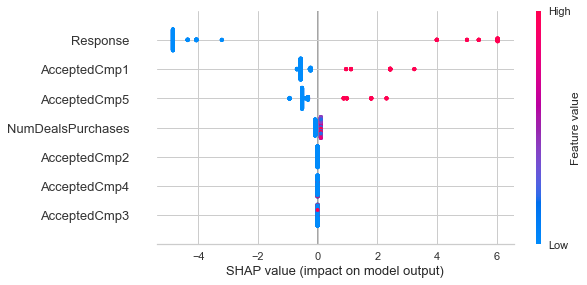

In [361]:
shap.summary_plot(shap_values1,X_test)

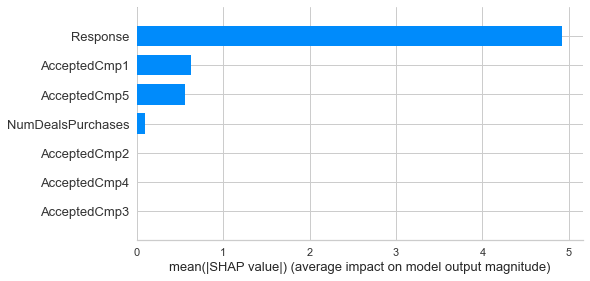

In [362]:
shap.summary_plot(shap_values1, X_test,plot_type='bar')

In [363]:
xgb2=XGBClassifier(random_state=42)
model_xgb2=xgb2.fit(X_sm,y_sm)

[17:18:14] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [364]:
y_pred_1=model_xgb2.predict(X_test)

In [365]:
mse=mean_squared_error(y_test,y_pred_1)
rmse=np.sqrt(mse)
print('Root mean squared error',rmse)

Root mean squared error 0.0


In [376]:
explainer2=shap.TreeExplainer(model_xgb2)
shap_values2=explainer2.shap_values(X_test)
shap_values2.shape

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(672, 7)

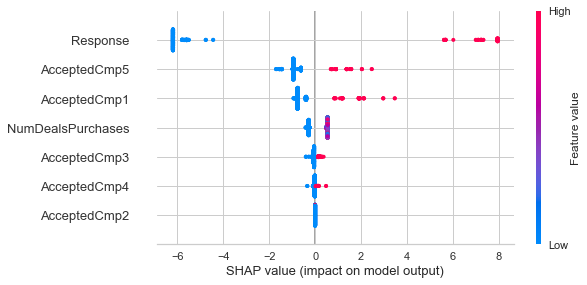

In [377]:
shap.summary_plot(shap_values2,X_test)

For both the under sampling and the oversampling the response column seems to have the highest impact on effectiveness of the campaign. The higher values means a positive campaign and lower value means negative campaign. This is followed by cmp-5 and cmp-1.<br>
From the business point of view spending money on 3 campaigns are sufficient to improve the effectiveness of the promotions. Adding a few discounts will also help a little.<br>
The final campaign is the most effective so stressing on that while promoting might encourage customers to purchase more due to FOMO